Takaaki Iwai, 31st December 2025

# Example Dashboard

## Infinite lines

`axvline` and `axhline` draw infinite vertical / horizontal lines, at given $x$ / $y$ positions. They are usually used to mark special data values, e.g. in this example the center and limit values of the sigmoid function.

`axline` draws infinite straight lines in arbitrary directions.

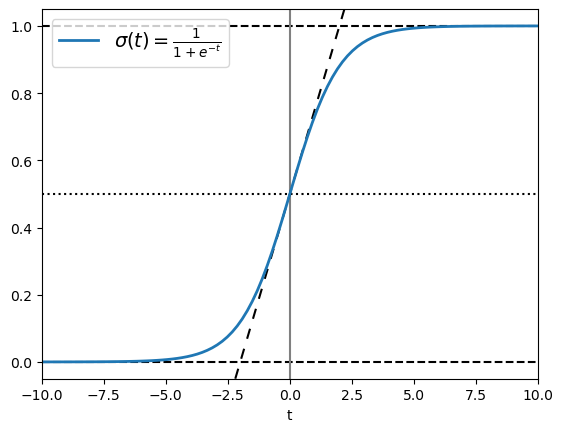

In [9]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))

fig, ax = plt.subplots()
ax.axhline(y=0, color="black", linestyle="--")
ax.axhline(y=0.5, color="black", linestyle=":")
ax.axhline(y=1.0, color="black", linestyle="--")
ax.axvline(color="grey")
ax.axline((0, 0.5), slope=0.25, color="black", linestyle=(0, (5, 5)))
ax.plot(t, sig, linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
ax.set(xlim=(-10, 10), xlabel="t")
ax.legend(fontsize=14)
plt.show()

## Stacked bar chart

This is an example of creating a stacked bar plot using `bar`.

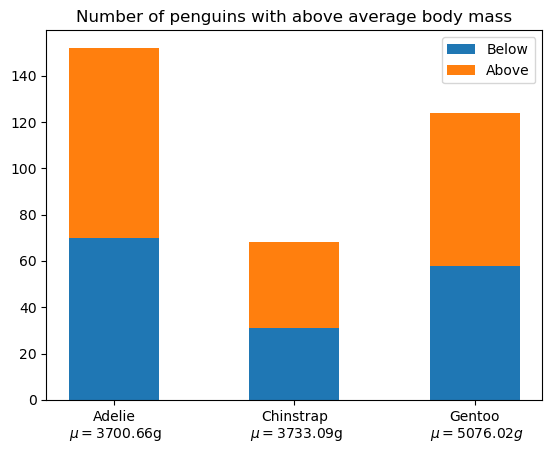

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# data from https://allisonhorst.github.io/palmerpenguins/

species = (
    "Adelie\n $\\mu=$3700.66g",
    "Chinstrap\n $\\mu=$3733.09g",
    "Gentoo\n $\\mu=5076.02g$",
)
weight_counts = {
    "Below": np.array([70, 31, 58]),
    "Above": np.array([82, 37, 66]),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(3)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Number of penguins with above average body mass")
ax.legend(loc="upper right")

plt.show()

## Filled polygon

`fill()` draws a filled polygon based on lists of point coordinates $x$, $y$.

This example uses the Koch snowflake as an example polygon.

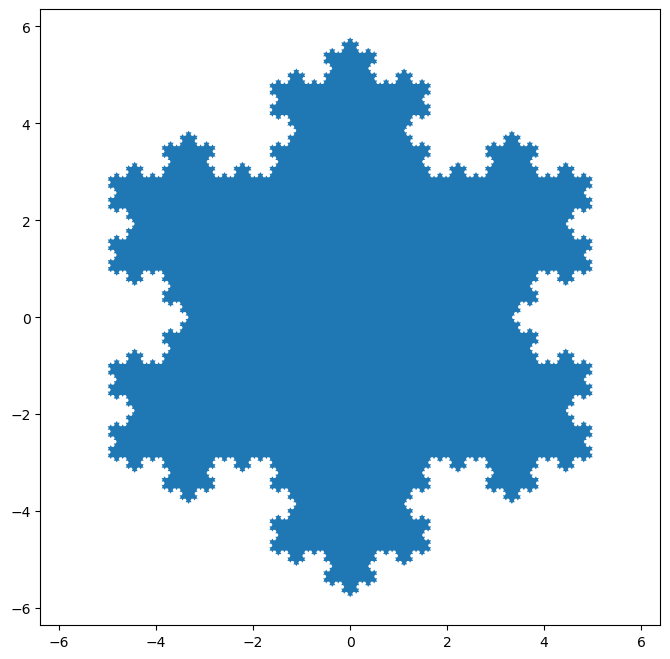

In [11]:
# Filled polygon

import matplotlib.pyplot as plt
import numpy as np


def koch_snowflake(order, scale=10):
    """
    Return two lists x, y of point coordinates of the Koch snowflake.

    Parameters
    ----------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3

            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)  # end points
            dp = p2 - p1  # connection vectors

            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y

x, y = koch_snowflake(order=5)

plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.fill(x, y)
plt.show()

https://github.com/takaaki-iwai/my-first-binder

https://mybinder.org/v2/gh/takaaki-iwai/my-first-binder/main?urlpath=voila%2Frender%2Fdashboard-test.ipynb